In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
from sklearn.datasets import load_breast_cancer


In [5]:
cancer_data = load_breast_cancer()

In [6]:
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='|S23')

In [7]:
cancer_data.target_names

array(['malignant', 'benign'],
      dtype='|S9')

In [8]:
#dataframe
data = pd.DataFrame(cancer_data['data'], columns = cancer_data['feature_names'])

In [9]:
data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


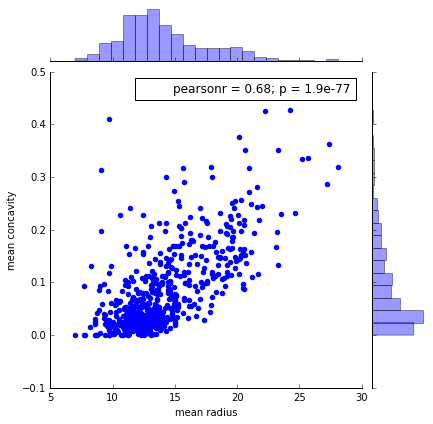

In [10]:
sns.jointplot(x = 'mean radius', y = 'mean concavity', data = data)

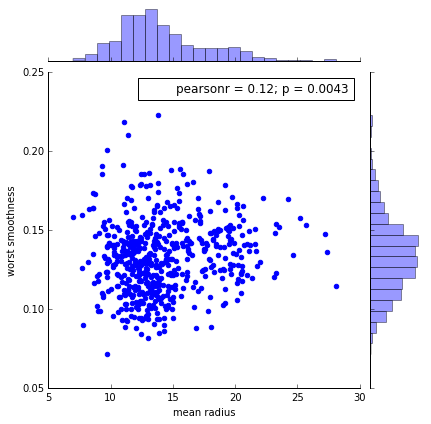

In [11]:
sns.jointplot(x = 'mean radius', y = 'worst smoothness', data = data)

In [12]:
#split data
from sklearn.model_selection import train_test_split

In [13]:
y = pd.DataFrame(cancer_data['target'],columns = ['cancer'] )
y.head(5)
#y.tail(10)

,cancer
0,0
1,0
2,0
3,0
4,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split( data, np.ravel(y), test_size = 0.3, random_state = 42)

In [15]:
from sklearn.svm import SVC
svm = SVC()

In [16]:
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
prediction = svm.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
print(confusion_matrix(y_test, prediction))

[[  0  63]
 [  0 108]]


In [20]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        63
          1       0.63      1.00      0.77       108

avg / total       0.40      0.63      0.49       171



/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
#GridsearchCV

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [24]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [25]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ....... kernel=rbf, C=0.1, gamma=1, score=0.624060, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ....... kernel=rbf, C=0.1, gamma=1, score=0.624060, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ....... kernel=rbf, C=0.1, gamma=1, score=0.628788, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ..... kernel=rbf, C=0.1, gamma=0.1, score=0.624060, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ..... kernel=rbf, C=0.1, gamma=0.1, score=0.624060, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ..... kernel=rbf, C=0.1, gamma=0.1, score=0.628788, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.01 ...................................
[CV] .... kernel

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ... kernel=rbf, C=0.1, gamma=0.001, score=0.624060, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.001 ..................................
[CV] ... kernel=rbf, C=0.1, gamma=0.001, score=0.628788, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.0001 .................................
[CV] .. kernel=rbf, C=0.1, gamma=0.0001, score=0.902256, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.0001 .................................
[CV] .. kernel=rbf, C=0.1, gamma=0.0001, score=0.909774, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.0001 .................................
[CV] .. kernel=rbf, C=0.1, gamma=0.0001, score=0.901515, total=   0.0s
[CV] kernel=rbf, C=1, gamma=1 ........................................
[CV] ......... kernel=rbf, C=1, gamma=1, score=0.624060, total=   0.0s
[CV] kernel=rbf, C=1, gamma=1 ........................................
[CV] ......... kernel=rbf, C=1, gamma=1, score=0.624060, total=   0.0s
[CV] kernel=rbf, C=1, gamma=1 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [26]:
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [27]:
gridPredict = grid.predict(X_test)

In [28]:
print(confusion_matrix(y_test,gridPredict))

[[ 59   4]
 [  2 106]]


In [29]:
print(classification_report(y_test,gridPredict))

             precision    recall  f1-score   support

          0       0.97      0.94      0.95        63
          1       0.96      0.98      0.97       108

avg / total       0.96      0.96      0.96       171



In [32]:
print("woahhhhhhhhhhhhh!")

woahhhhhhhhhhhhh!
